In [1]:
import gc
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from logzero import logger

import lightgbm as lgb

In [2]:
ls -lah ../data/*.feather

-rw-r--r-- 1 ubuntu ubuntu  14K May  5 12:25 ../data/agg_by_app.feather
-rw-r--r-- 1 ubuntu ubuntu 4.3K May  5 04:22 ../data/agg_by_channel.feather
-rw-r--r-- 1 ubuntu ubuntu  35K May  5 05:47 ../data/channel_pca.feather
-rw-r--r-- 1 ubuntu ubuntu 4.8G Apr 30 14:27 ../data/click_data.feather
-rw-r--r-- 1 ubuntu ubuntu  93K May  5 04:53 ../data/count_channel_coincidence_per_user.feather
-rw-r--r-- 1 ubuntu ubuntu 1.1M May  5 12:36 ../data/count_user_by_app_channel.feather
-rw-r--r-- 1 ubuntu ubuntu 1.1M May  5 04:27 ../data/count_user_by_channel_app.feather
-rw-r--r-- 1 ubuntu ubuntu  18G May  4 07:40 ../data/merge.feather
-rw-r--r-- 1 ubuntu ubuntu  27K May  5 12:31 ../data/uqcount_by_app.feather
-rw-r--r-- 1 ubuntu ubuntu 8.4K May  5 04:26 ../data/uqcount_by_channel.feather


In [4]:
%%time
click_data = pd.read_feather("../data/merge.feather", nthreads=64)

CPU times: user 7.4 s, sys: 7.61 s, total: 15 s
Wall time: 4.58 s


In [5]:
%%time
channel_pca = pd.read_feather("../data/channel_pca.feather", nthreads=64)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 3.51 ms


In [ ]:
%%time
app_pca = pd.read_feather("../data/app_pca.feather", nthreads=64)

In [6]:
channel_pca.head()

,channel,channel_pca_01,channel_pca_02,channel_pca_03,channel_pca_04,channel_pca_05,channel_pca_06,channel_pca_07,channel_pca_08,channel_pca_09,...,channel_pca_11,channel_pca_12,channel_pca_13,channel_pca_14,channel_pca_15,channel_pca_16,channel_pca_17,channel_pca_18,channel_pca_19,channel_pca_20
0,0,-752818.244165,51908.446351,24084.129406,-61086.744195,69772.192004,9664.098810,-21196.799379,5825.773622,10385.103648,...,-12887.367785,-2545.875057,-37452.297652,4153.414052,8944.322702,5453.486828,7468.202736,724.312470,3826.247412,2832.185252
1,3,-130830.412280,-39690.161209,-75434.725347,-49293.680501,-2887.239246,114504.559921,175029.709959,-135512.245910,-48637.925197,...,-1681.408214,-1708.302756,47264.302591,-13309.292334,-12437.432243,-18154.741356,-21433.616990,-10974.927755,-27888.468723,-5670.686402
2,4,-753386.848518,51979.279630,24131.105319,-61155.075120,69854.031239,9622.948792,-21246.193832,5839.320265,10416.722360,...,-12984.261963,-2582.235473,-37749.390562,4175.201124,9028.090233,5526.026571,7551.844882,731.748658,3884.571108,2873.608418
3,5,-742193.572720,50291.630508,23837.067834,-58894.469669,67275.447628,8970.978590,-20197.406721,6673.033984,9845.711583,...,-12450.057179,-2376.740001,-36298.403254,3999.363226,8873.627135,5868.181044,7663.260330,326.569169,3127.659777,2897.295679
4,13,-659150.843687,39703.522279,19338.725568,-51718.550735,57973.518248,17399.894770,-9317.838809,17013.266838,2051.281541,...,-3649.617223,1863.984973,3756.454250,-2246.902155,11516.344750,-5239.480764,-10999.921091,2755.701520,15534.328965,6055.053807


In [ ]:
app_pca.head()

In [7]:
%%time
click_data = pd.merge(click_data[:10000], channel_pca, on = 'channel')

CPU times: user 16 ms, sys: 64 ms, total: 80 ms
Wall time: 78.6 ms


In [7]:
%%time
click_data = pd.merge(click_data[:10000], app_pca, on = 'app')

CPU times: user 16 ms, sys: 64 ms, total: 80 ms
Wall time: 78.6 ms


In [8]:
click_data.head()

,app,channel,click_id,device,ip,is_attributed,os,click_time,is_test,dow,...,channel_pca_11,channel_pca_12,channel_pca_13,channel_pca_14,channel_pca_15,channel_pca_16,channel_pca_17,channel_pca_18,channel_pca_19,channel_pca_20
0,23,153,99999999,1,76508,0,35,2017-11-07 03:00:00,False,1,...,-348549.845334,-77614.547914,-38500.424776,24771.030152,-153632.340365,7045.79432,-13728.478101,-15467.158402,-53208.850258,-44464.129181
1,1,153,99999999,1,95766,0,17,2017-11-07 03:00:20,False,1,...,-348549.845334,-77614.547914,-38500.424776,24771.030152,-153632.340365,7045.79432,-13728.478101,-15467.158402,-53208.850258,-44464.129181
2,1,153,99999999,1,95766,0,17,2017-11-07 03:00:32,False,1,...,-348549.845334,-77614.547914,-38500.424776,24771.030152,-153632.340365,7045.79432,-13728.478101,-15467.158402,-53208.850258,-44464.129181
3,23,153,99999999,1,95766,0,17,2017-11-07 03:00:46,False,1,...,-348549.845334,-77614.547914,-38500.424776,24771.030152,-153632.340365,7045.79432,-13728.478101,-15467.158402,-53208.850258,-44464.129181
4,23,153,99999999,1,95766,0,17,2017-11-07 03:00:47,False,1,...,-348549.845334,-77614.547914,-38500.424776,24771.030152,-153632.340365,7045.79432,-13728.478101,-15467.158402,-53208.850258,-44464.129181


In [9]:
click_data.shape

(10000, 57)

In [10]:
click_data.dtypes

app                                                uint16
channel                                            uint16
click_id                                           uint32
device                                             uint16
ip                                                 uint32
is_attributed                                       uint8
os                                                 uint16
click_time                                 datetime64[ns]
is_test                                              bool
dow                                                 uint8
hour                                                uint8
minute                                              uint8
min5                                                uint8
second                                              uint8
sin_time                                          float64
cos_time                                          float64
ip_os_device                                       uint64
ip_os_device_d

In [11]:
droplist = ['minute',
            'min5',
            'ip_os_device',
            'ip_os_device_dow_hour',
            'ip_os_device_dow_hour_min5',
            'channel',
            'rank_by_ip_os_device_dow_hour',
            'rank_by_ip_os_device_dow_hour_min5',
            'click_id',
            'click_time',
            'click_time_prev',
            'click_time_next'
           ]

In [12]:
%%time
logger.info("Splitting data...")
click_data.drop(columns=droplist, inplace=True)
train = click_data[click_data["dow"] < 3]
valid = click_data[click_data["dow"] == 3]

del click_data
gc.collect()

[I 180505 13:02:50 <timed exec>:1] Splitting data...


CPU times: user 48 ms, sys: 16 ms, total: 64 ms
Wall time: 62.4 ms


In [37]:
%%time
y_train = train["is_attributed"].astype("int")
train.drop(columns=["is_attributed"], inplace=True)
y_valid = valid["is_attributed"].astype("int")
valid.drop(columns=["is_attributed"], inplace=True)
gc.collect()

CPU times: user 2.46 s, sys: 2.38 s, total: 4.83 s
Wall time: 4.82 s


In [38]:
%%time
logger.info("Generating matrix...")
dtrain = xgb.DMatrix(train, y_train, nthread=40)
del train, y_train
gc.collect()

dvalid = xgb.DMatrix(valid, y_valid, nthread=40)
del valid, y_valid
gc.collect()

[I 180505 12:26:49 <timed exec>:1] Generating matrix...


CPU times: user 2min 15s, sys: 46.9 s, total: 3min 2s
Wall time: 2min 6s


In [39]:
lgb_params = {
    'boosting_type': 'gbdt',
    'objective': objective,
    'metric':metrics,
    'learning_rate': 0.2,
    #'is_unbalance': 'true',  #because training data is unbalance (replaced with scale_pos_weight)
    'num_leaves': 31,  # we should let it be smaller than 2^(max_depth)
    'max_depth': -1,  # -1 means no limit
    'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
    'max_bin': 100,  # Number of bucketed bin for feature values
    'subsample': 0.7,  # Subsample ratio of the training instance.
    'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
    'colsample_bytree': 0.9,  # Subsample ratio of columns when constructing each tree.
    'min_child_weight': 5,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
    'subsample_for_bin': 200000,  # Number of samples for constructing bin
    'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
    'reg_alpha': 0,  # L1 regularization term on weights
    'reg_lambda': 0,  # L2 regularization term on weights
    'nthread': 64,
    'verbose': 0,
    'metric':'auc',
    'scale_pos_weight':99
}

[I 180505 12:28:55 <timed exec>:2] Validating...


[0]	train-auc:0.942592	valid-auc:0.933827
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 25 rounds.
[5]	train-auc:0.961672	valid-auc:0.953096
[10]	train-auc:0.966154	valid-auc:0.956964
[15]	train-auc:0.969694	valid-auc:0.959887
[20]	train-auc:0.971716	valid-auc:0.962692
[25]	train-auc:0.97357	valid-auc:0.964298
[30]	train-auc:0.974855	valid-auc:0.965113
[35]	train-auc:0.975963	valid-auc:0.965824
[40]	train-auc:0.976838	valid-auc:0.966206
[45]	train-auc:0.977615	valid-auc:0.966617
[50]	train-auc:0.978178	valid-auc:0.966793
[55]	train-auc:0.978783	valid-auc:0.967023
[60]	train-auc:0.9793	valid-auc:0.9671
[65]	train-auc:0.979812	valid-auc:0.967287
[70]	train-auc:0.980166	valid-auc:0.967271
[75]	train-auc:0.980596	valid-auc:0.967357
[80]	train-auc:0.981047	valid-auc:0.967273
[85]	train-auc:0.981403	valid-auc:0.967149
[90]	train-auc:0.981755	valid-auc:0.967135
[95]	train-auc:0.982043	valid-auc:0.966818
[100

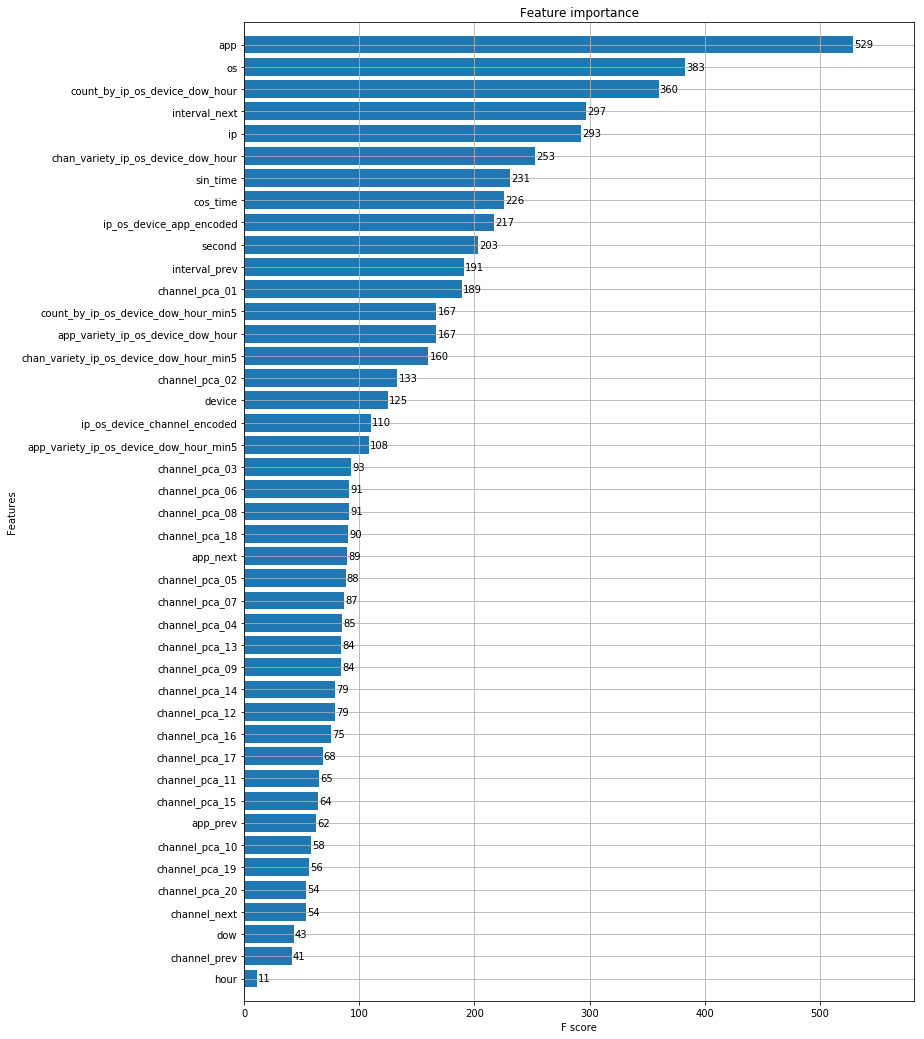

In [40]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

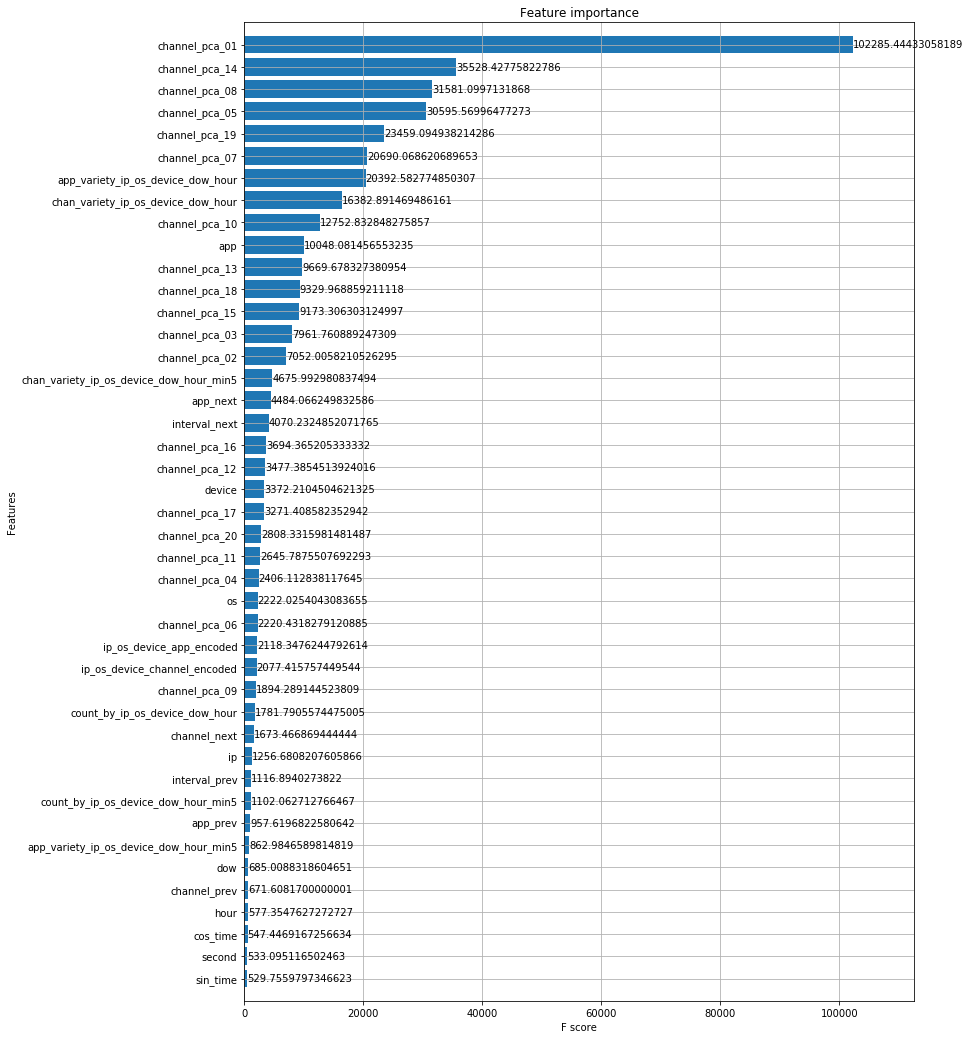

In [41]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax, importance_type='gain')
plt.show()